# Case Study - Bike Sharing

# **Context:**

Bike-sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles. Today, there exists a great interest in these systems due to their important role in traffic, environmental, and health issues.


# **Problem Statement:**
'Travel Along' is a new bike-sharing company and wants to expand its customer count and provide better services at a reasonable cost. They have conducted several surveys and collated the data about weather, weekends, holidays, etc. from the past 2 years.

As a recently hired data scientist at 'Travel Along', you have been asked to analyze the patterns in the data and figure out the key areas which can help the organization to grow and manage the customer demands. Further, you need to use this information to predict the count of bikes shared so that the company can take prior decisions for surge hours.

# **Objective:**

- What are the different factors which affect the target variable? What business recommendations can we give based on the analysis?
- How can we use different ensemble techniques - Bagging, Boosting, and Stacking to build a model to predict the count of bikes rented?

# **Data Description:**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday then 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max). The “feel like” temperature relies on environmental data including the ambient air temperature, relative humidity, and wind speed to determine how weather conditions feel to bare skin.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Index

- <a href = #link1>Overview of the dataset </a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Split the dataset</a>


- <a href = #link4>Decision Tree Model </a> 


- <a href = #link5>Random Forest Model</a>


- <a href = #link6>Boosting Models</a>


- <a href = #link7>Stacking Model</a>


- <a href = #link8>Business Recommendations</a>

## <a id = "link1"></a> Overview of the dataset 

**Let's start by importing libraries we need.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Standard Libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

## Decision Tree Regression Library 
from sklearn.tree import DecisionTreeRegressor

## Ensemble Regression Library 
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

## XGBoost Library
from xgboost import XGBRegressor

## Additional ML Libraries
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
#Loading dataset
data=pd.read_csv("hour.csv")

**View the first 5 rows of the dataset.**

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



- Anyone spot a problem with any of the features? (Note the target variable is cnt)

#### Check if Casual & Registered always add up to cnt

In [4]:
## Check if 100% of the time they add up
sum(data['casual'] + data['registered'] == data['cnt']) / len(data)

1.0

- Looks like these variables are a part of the target variable.
- To avoid having a model that will be biased by these features - we will drop

**Check data types and number of non-null values for each column.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- We can see that there are total 17 columns and 17,379 number of rows in the dataset.
- All columns' data type is either integer or float except one column - 'dteday' which is of object type.
- The number of non-null value of each column is equal to number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.**

In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values in the data.

**Number of unique values in each column**

In [7]:
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

- We can drop 'instant' column as it is an ID variable and will not add value to the model.
- We can drop 'dteday' column as it just contains dates of 731 days i.e. 2 years. This will not add value to the model.

In [8]:
#Dropping two columns from the dataframe
data.drop(columns=['instant','dteday','casual','registered'], inplace=True)

**Summary of the dataset**

In [9]:
# Summary of continuous columns
data[['temp','atemp','hum','windspeed','cnt']].describe().T

# data.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


- Mean and median value of temperature is approx 0.50
- Mean and median value for 'atemp' is approx 0.47 and 0.48 respectively
- Mean and median value for 'hum' is approx 0.627 and 0.63 respectively
- Wind speed has some extreme values at the right end
- Target variable seems to have skewed distribution as higher values are on the right. We will explore this further.

**Number of observations in each category**

In [10]:
cat_cols=['season','yr','holiday','workingday','weathersit']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
------------------------------
1    8734
0    8645
Name: yr, dtype: int64
------------------------------
0    16879
1      500
Name: holiday, dtype: int64
------------------------------
1    11865
0     5514
Name: workingday, dtype: int64
------------------------------
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
------------------------------


- Number of observations from year 0 i.e. 2011 is slightly more than number of observations from year 1 i.e. 2012.
- As expected, number of non-holidays and working days are much higher than number of holidays and non-working days respectively.
- We have only 3 observations where weathersit=4 and most common is 1 i.e. clear or partly cloudy.

**Quick Sanity Check of Discrete Features**

In [11]:
data[['mnth','hr','weekday']].describe().T

,count,mean,std,min,25%,50%,75%,max
mnth,17379.0,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
weekday,17379.0,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0


## <a id = "link2"></a> EDA

### Univariate analysis

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

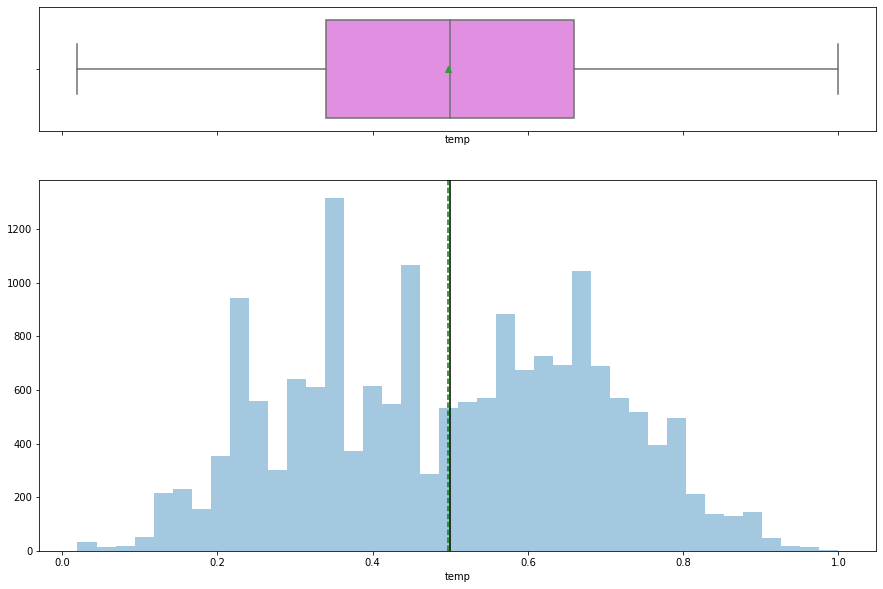

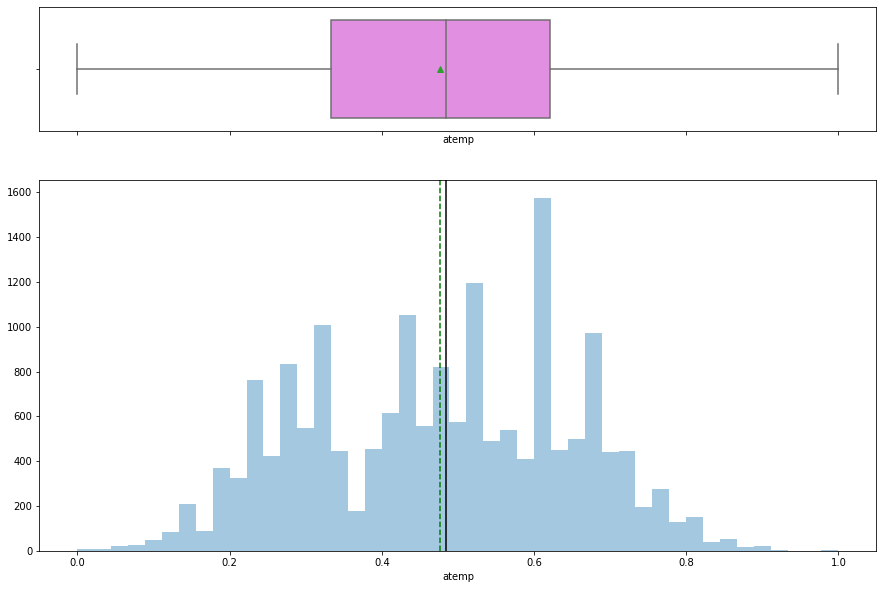

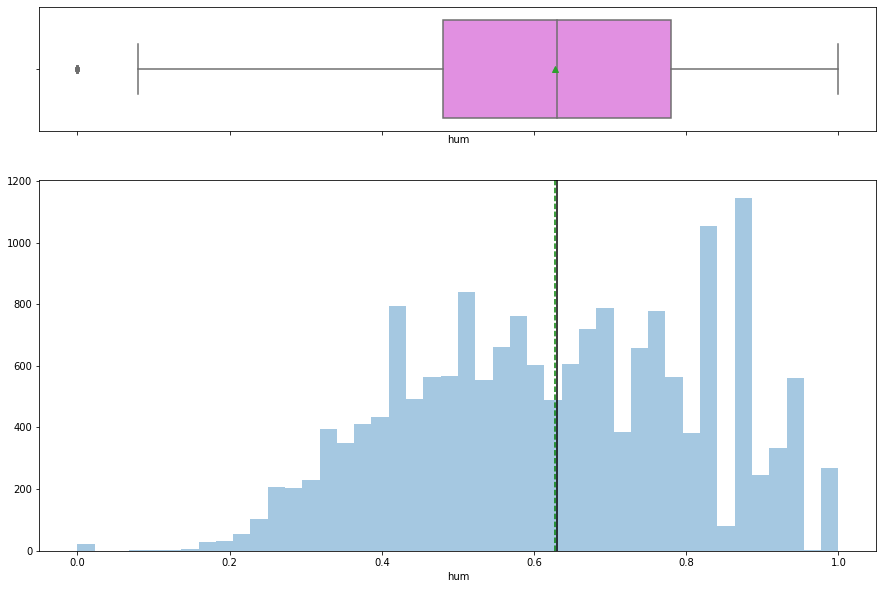

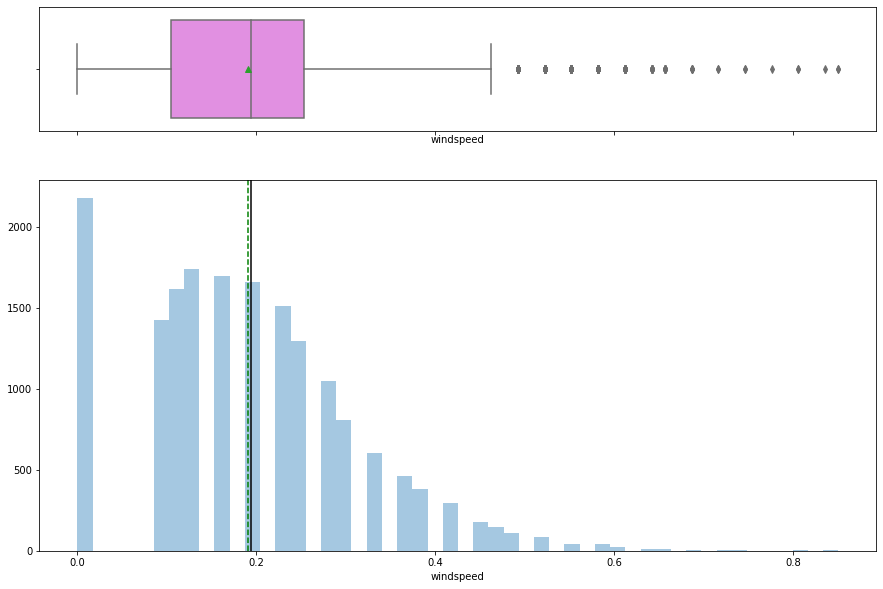

In [13]:
histogram_boxplot(data['temp'])

histogram_boxplot(data['atemp'])

histogram_boxplot(data['hum'])

histogram_boxplot(data['windspeed'])

**Observations on temperature**
- Temperature has an approx symmetric distribution with mean and median equal to 0.5
- As evident from the boxplot, there are no outliers in the distribution for this variable

**Observations on 'feel like temperature'**
- Same as temperature, the distribution for feel like temperature is also symmetrically distributed
- There are no outliers in the distribution of this variables

**Observations on Humidty**
- Most of values are concentrated in the middle i.e. 0.4 to 0.8
- Humidity with value equal to 0 is an outlier
- The distribution is approx normally distributed with mean and median equal to 0.63

**Observations on Windspeed**
- Wind speed has a right skewed distribution and 0 has the highest count among all observations
- Distribution is not symmetric but mean and median are approx equal with value equal to 0.19
- There are many outliers in this variable

**Observations on Target Variable**

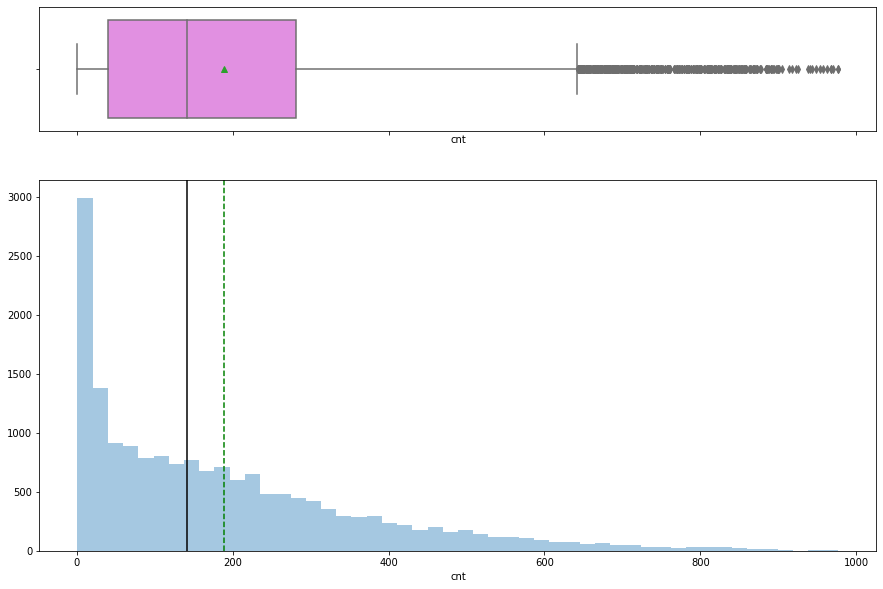

Top 5 Largest Values


14773    977
14964    976
14748    970
14725    968
15084    967
Name: cnt, dtype: int64

In [14]:
histogram_boxplot(data['cnt'])
plt.show()

#Top 5 highest values 
print("Top 5 Largest Values")
display(data['cnt'].nlargest())

- The target variable i.e. the count of bikes rented has a right skewed distribution
- The range of values is very large with many observations being less than 10 count and some being greater than 900 count
- As evident from the boxplot, there are many outliers

**Function to create barplots that indicate percentage for each category**

In [15]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, )
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

hr


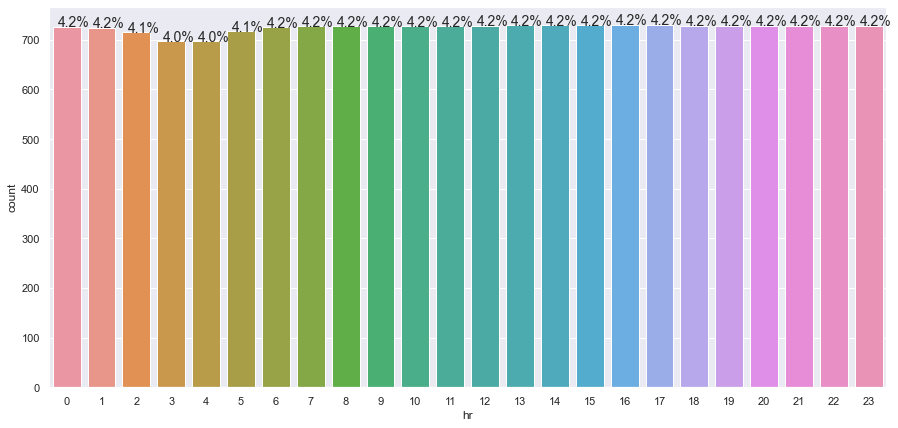

mnth


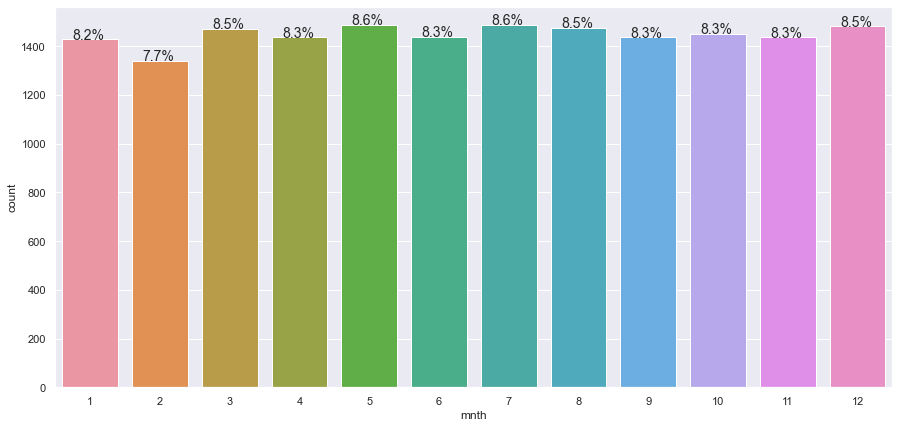

season


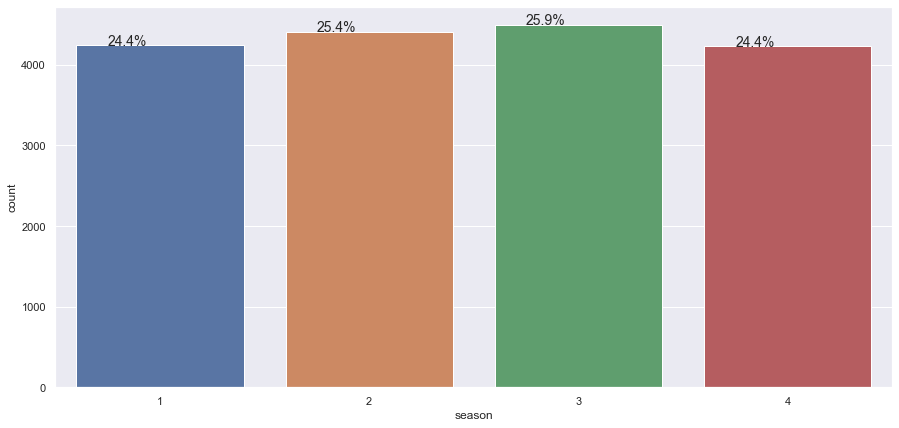

yr


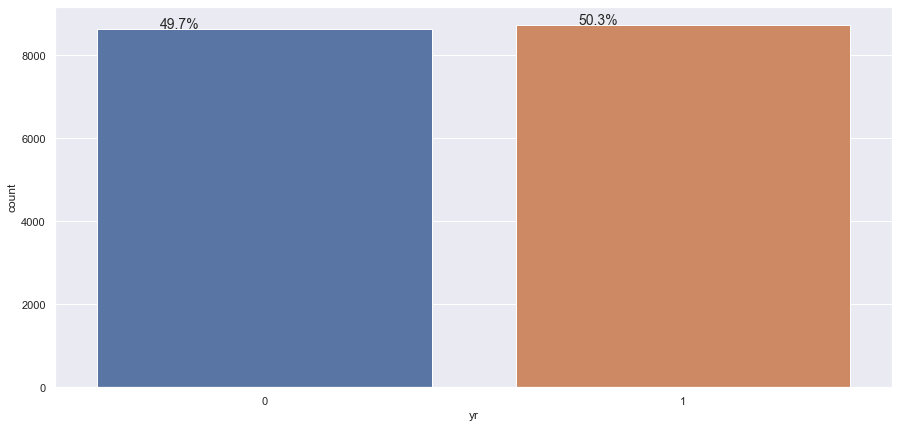

weathersit


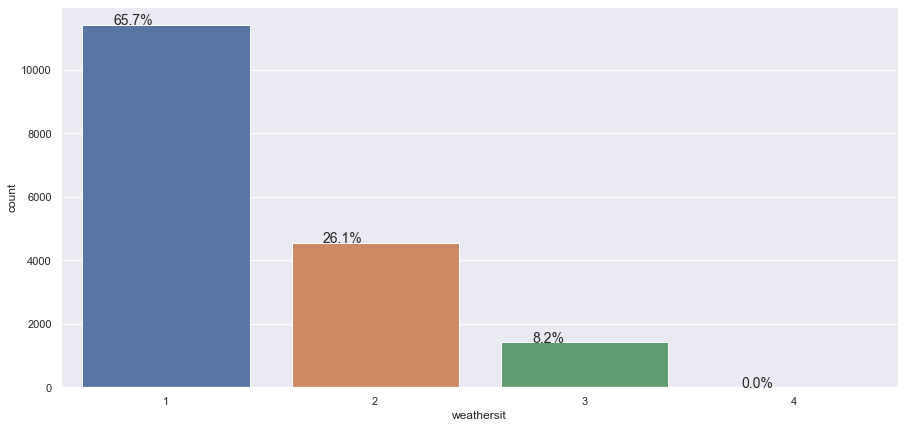

holiday


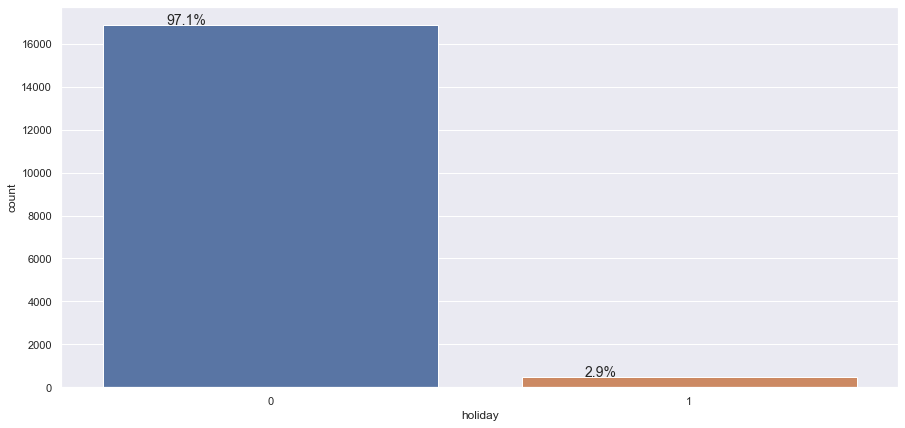

weekday


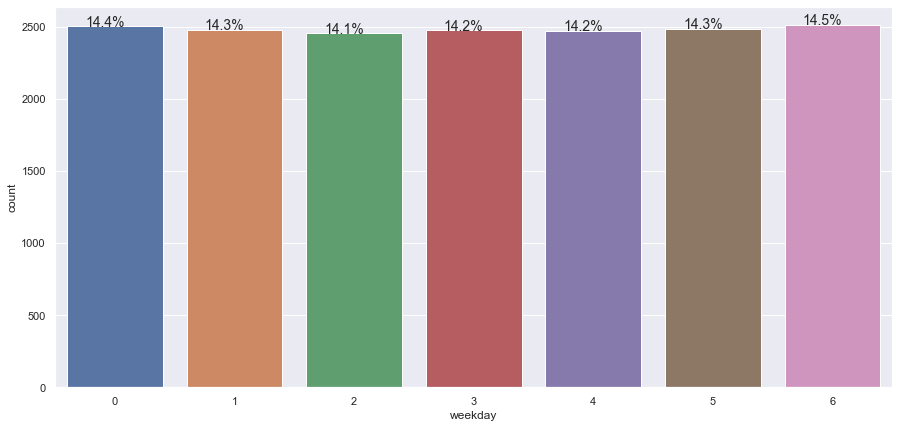

workingday


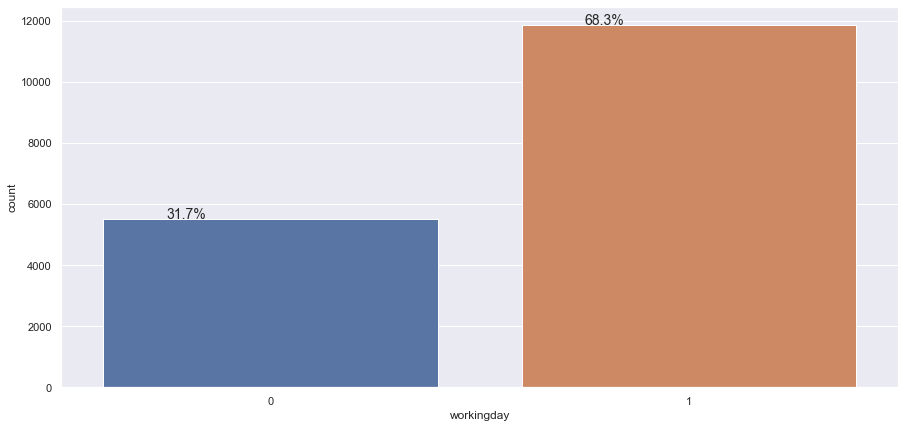

In [16]:
for i in ['hr','mnth','season','yr','weathersit','holiday','weekday','workingday']:
    print(i)
    perc_on_bar(data[i])


**Observations on Hours**
- Each hour i.e. 0 to 23 has approx 4% observations in the data

**Observations on Months**
- Each month i.e. 1 to 12 has approx 8.5% observations in the data
- Month 2 has slightly less number of observations compared to other months

**Observations on Season**
- Each season has approx 24% observations in the data

**Observations on Year**
- Both years have approx equal number of observations in the data

**Observations on Weather Situation**
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Clear (1) has highest percentage of observations i.e. 65.7%

**Observations on Weather Situation**
- As expected the percentage for non holidays is much more than holidays.
- There are 97% non holidays observations and only 3% for holidays

**Observations on Weekday**
- Each weekday i.e. 0 to 6 has approx 14% observations in the data.

**Observations on Working Day**
- As expected, number of observations for working days is higher than the number of observations for non working days.
- There are approx 68% observations for working days and 32% observations for non working days.

### Bivariate analysis

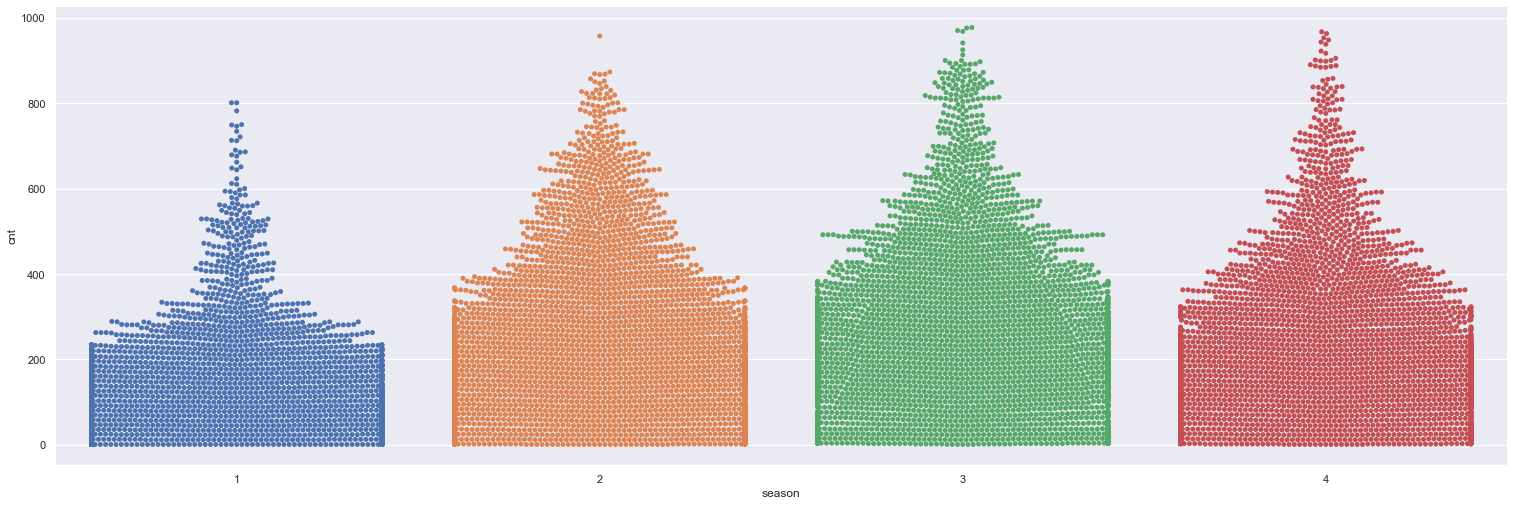

In [18]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="season", y="cnt", kind="swarm", data=data, height=7, aspect=3);

-  (1:spring, 2:summer, 3:fall, 4:winter)

- The lowest number of bikes are rented in first season
- Highest number of bikes are shared in 3rd season
- This can be due to the relatively high temperature in season 1 i.e. spring as compared to the season 3 i.e. fall

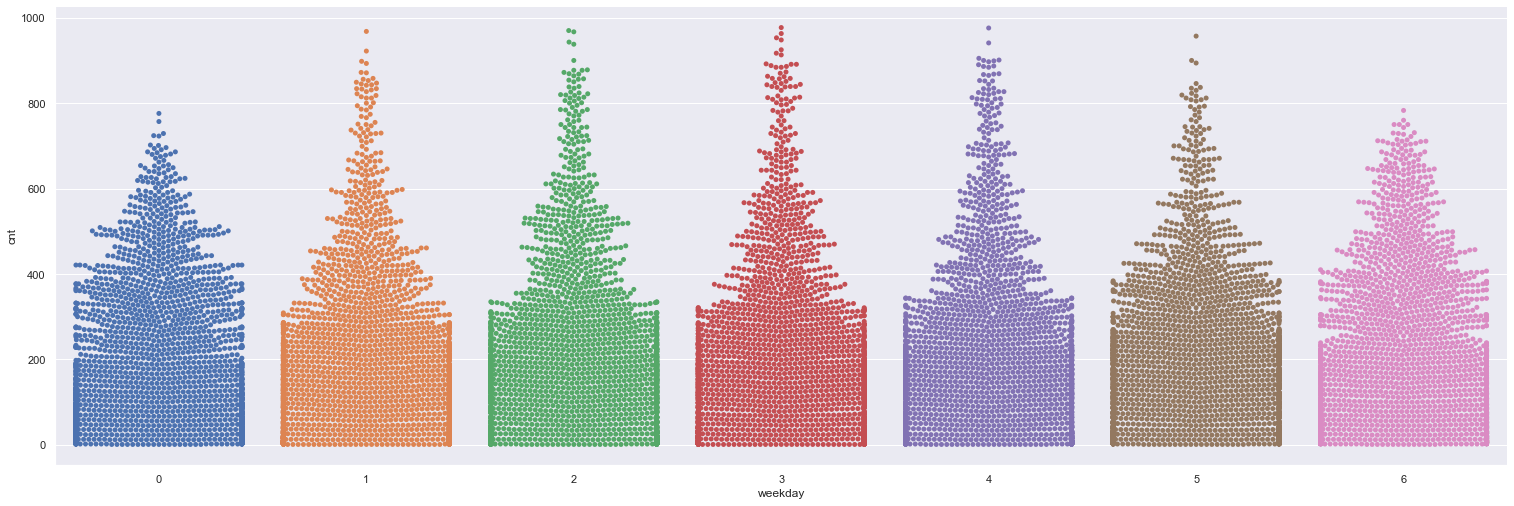

In [19]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="weekday", y="cnt", kind="swarm", data=data, height=7, aspect=3);

- Weekends i.e. weekday=0 and weekday=6 have low count of bikes rented and it is less varying.
- Working days have higher count of bikes rented and have more variation in the count and there are some outliers for days from 1 to 5.
- This can be due to closed schools/offices on weekends.

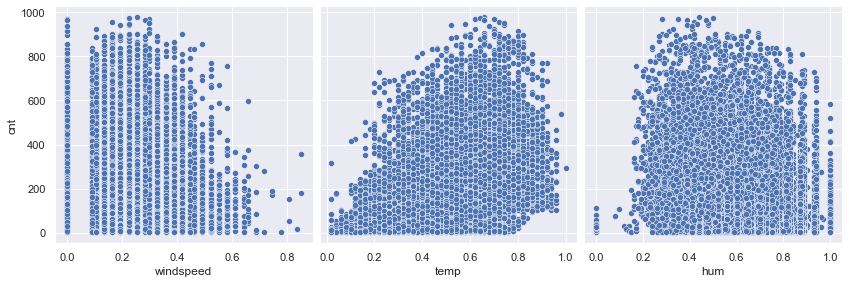

In [20]:
sns.pairplot(
    data,
    x_vars=["windspeed", "temp", "hum"],
    y_vars=["cnt"],
    height=4,
    aspect=1
    );

- We can see that count of bikes rented is low when temperature is very low or very high. Same is true for humidity.
- Count of bikes rented is high when wind speed is low.

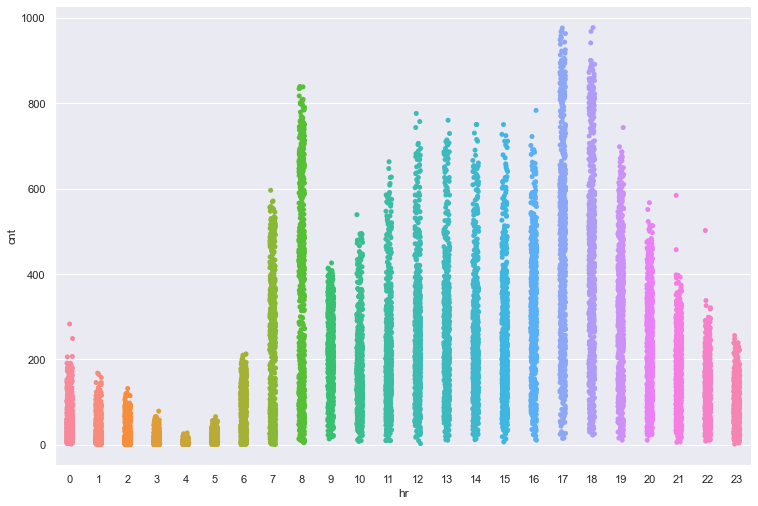

In [21]:
sns.catplot(x="hr", y="cnt", data=data, height=7, aspect=1.5);

- We can see average number of bikes rented is high at 8 AM and 5-6 PM, this can be due to office/school/college timings.
- Average number of bikes rented is very low for night time i.e. 12 AM to 5 AM.

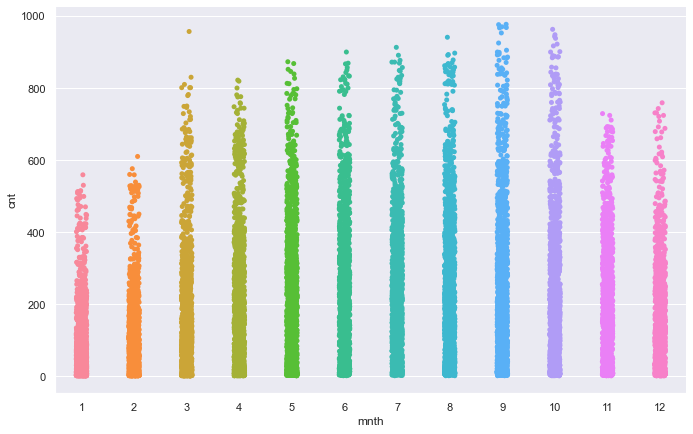

In [22]:
sns.catplot(x="mnth", y="cnt", data=data, height=6, aspect=1.6, estimator=np.mean);

- Average number of bikes rented is low for months - December, November, January, February. This can be due to the cold weather in these months.
- Average number of bikes rented is consistently high for months from May to October.

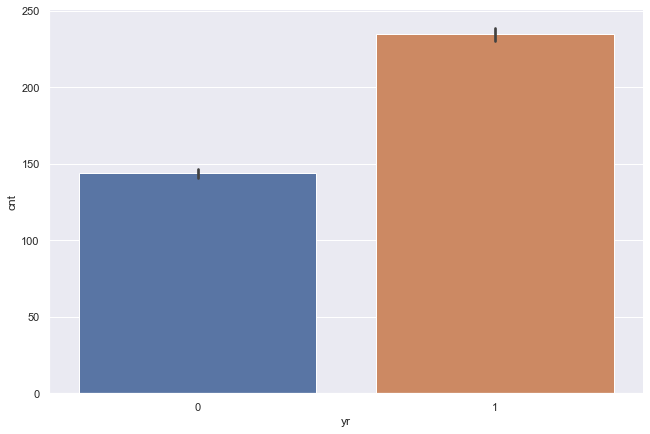

In [23]:
sns.catplot(x="yr", y="cnt", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

- Average count of bikes rented is high for year 2012 as compared to 2011.
- Let's check this for each season of both years and observe if count in each season has increased or in just 1 or 2 seasons. 

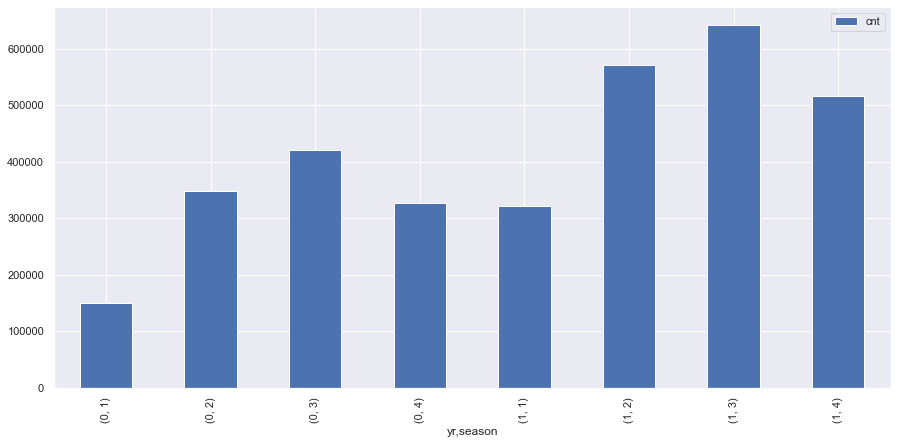

In [24]:
sns.set(rc={'figure.figsize':(15,7)})
pd.pivot_table(data=data, index=['yr', 'season'], values='cnt', aggfunc=np.sum).plot(kind='bar');

- We can see that number of bikes rented is higher in year 2012 for each season as compared to seasons in 2011.
- This shows that bike sharing is becoming more popular with time.

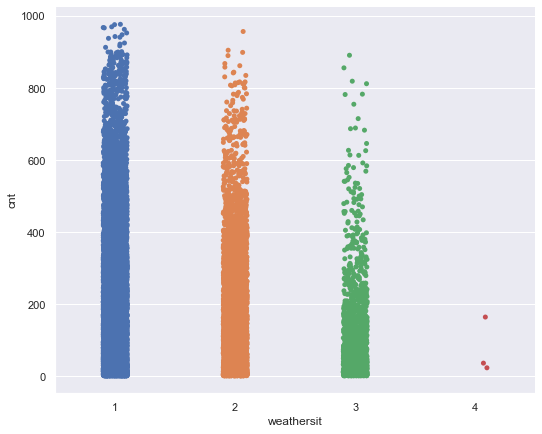

In [25]:
sns.catplot(x="weathersit", y='cnt', data=data, size=6, aspect=1.25, estimator=np.mean);

- As expected, average count of bikes rented is much higher on clear or partly cloudy days compared to snowy or rainy days.
- This implies that the average count of bikes rented is hugely affected by the weather.

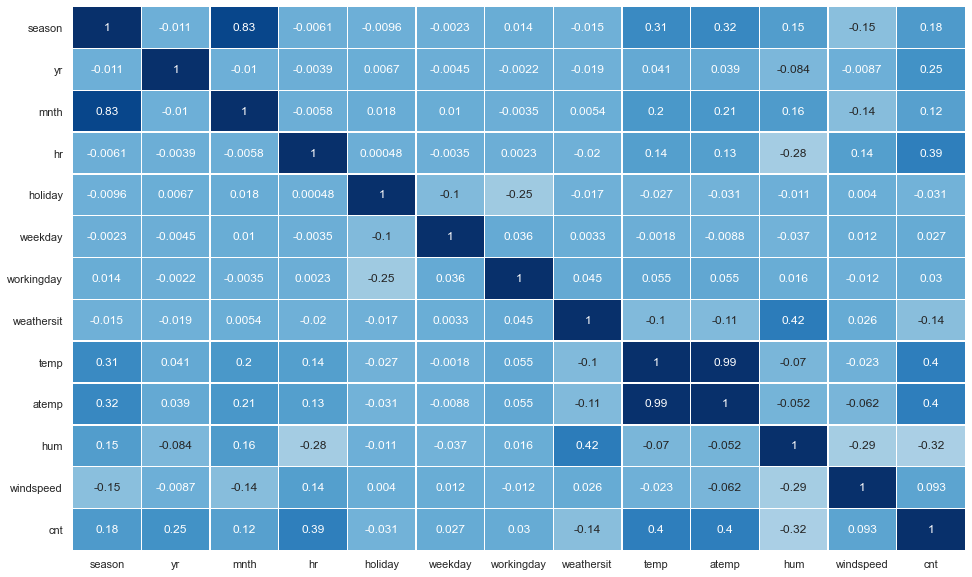

In [26]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Blues")
plt.show()

- We can see that temperature and feel like temperature are almost perfectly correlated
- Month and season have high positive correlation among them
- As count is addition of two columns - Casual and registered. We can drop these two columns because if we have casual and registered count then making a model won't make sense as we can simply add them. We would not have these 2 column while predicting new observations

In [33]:
#Dropping columns - atemp (Could be atemp or temp)
data.drop(columns=['atemp'], inplace=True)

#### Anyone spotted a problem with our remaining features for predictions in the future? :) 


In [85]:
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## <a id = "link3"></a> Split the dataset

In [34]:
# Separating features and the target column
X = data.drop('cnt', axis=1)
y = data['cnt']

In [35]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [36]:
X_train.shape, X_test.shape

((12165, 11), (5214, 11))

- We have 12,165 observations in the train set and 5,214 observations in the test set.

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use same codes repeatedly.

In [37]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

## <a id = "link4"></a>Decision Tree Model

In [38]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [39]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  0.9999939364265239
R-square on test set :  0.8891768380852025
RMSE on training set :  0.4424086819235673
RMSE on test set :  61.682701447360955


- Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [40]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.1, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [49]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.9587549292016613
R-square on test set :  0.9115527504103258
RMSE on training set :  36.48760396971141
RMSE on test set :  55.10490823169712


- The overfitting is reduced after hyperparameter tuning and test score has increased by approx 2%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.634234
temp        0.132520
yr          0.079286
workingday  0.065723
season      0.022010
weathersit  0.019933
hum         0.019629
mnth        0.011209
weekday     0.010081
windspeed   0.003653
holiday     0.001723


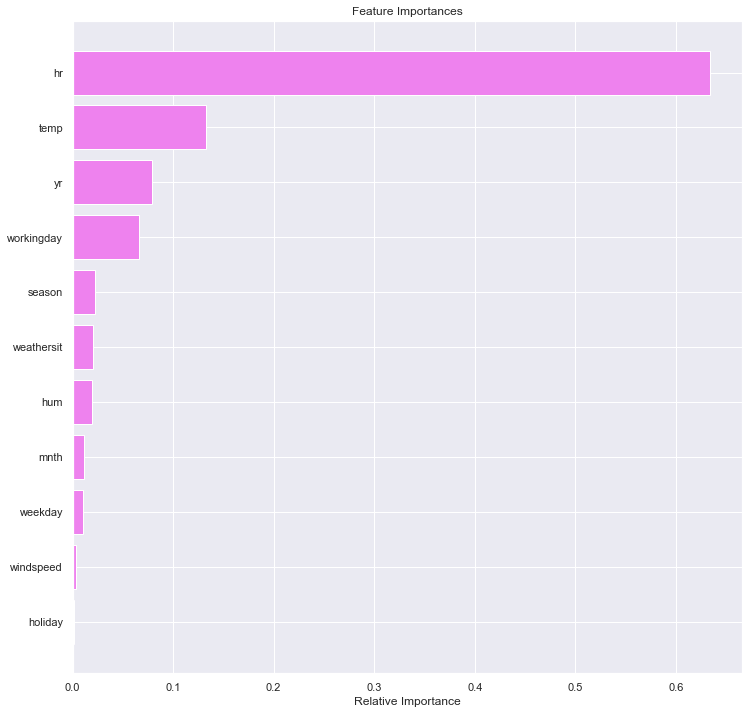

In [53]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature, in addition to temp and yr, for tuned decision tree model

## <a id = "link5"></a>Random Forest Model
- More staple than decision tree (more robust prediction)

In [54]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [55]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9919203921570585
R-square on test set :  0.9420854830487395
RMSE on training set :  16.149328167193783
RMSE on test set :  44.59044807741992


- Random forest is giving good r2 score of 94% on the test data but it is slightly overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [56]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [57]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9919578052087761
R-square on test set :  0.9422732566336115
RMSE on training set :  16.11189462303149
RMSE on test set :  44.51810260579664


- No significant change in the result. The result is almost same before or after the hyperparameter tuning.

In [58]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.610768
temp        0.136950
yr          0.076299
workingday  0.059698
hum         0.028954
weathersit  0.021384
season      0.021337
mnth        0.016787
weekday     0.013838
windspeed   0.011174
holiday     0.002812


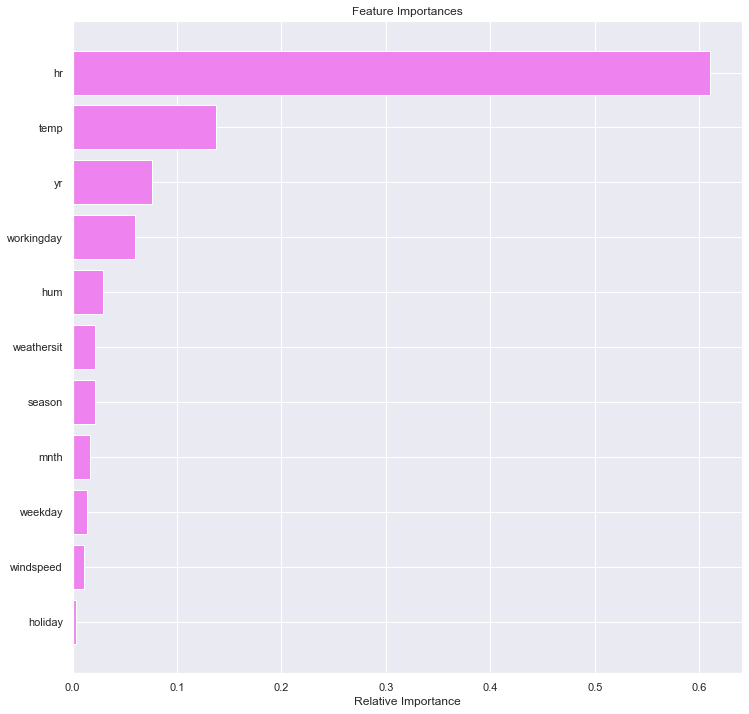

In [59]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature, in addition to temp and yr, for the tuned random forest model.

## <a id = "link6"></a>Boosting Models

### AdaBoost Regressor
- https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe
- Each row that was not predicted well are given a higher weight - with a focus to increase performancne

In [60]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [61]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.653482138019597
R-square on test set :  0.6643839196204298
RMSE on training set :  105.7601679604146
RMSE on test set :  107.34195427154356


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to decision tree and random forest model.  

### Hyperparameter Tuning

In [62]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='linear',
                  n_estimators=80, random_state=1)

In [63]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.6898172233064839
R-square on test set :  0.7016824652606566
RMSE on training set :  100.06176483787141
RMSE on test set :  101.20163011535602


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [64]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.515753
yr          0.111521
temp        0.104162
hum         0.060375
workingday  0.059885
season      0.058951
weathersit  0.054573
mnth        0.034495
holiday     0.000167
windspeed   0.000117
weekday     0.000000


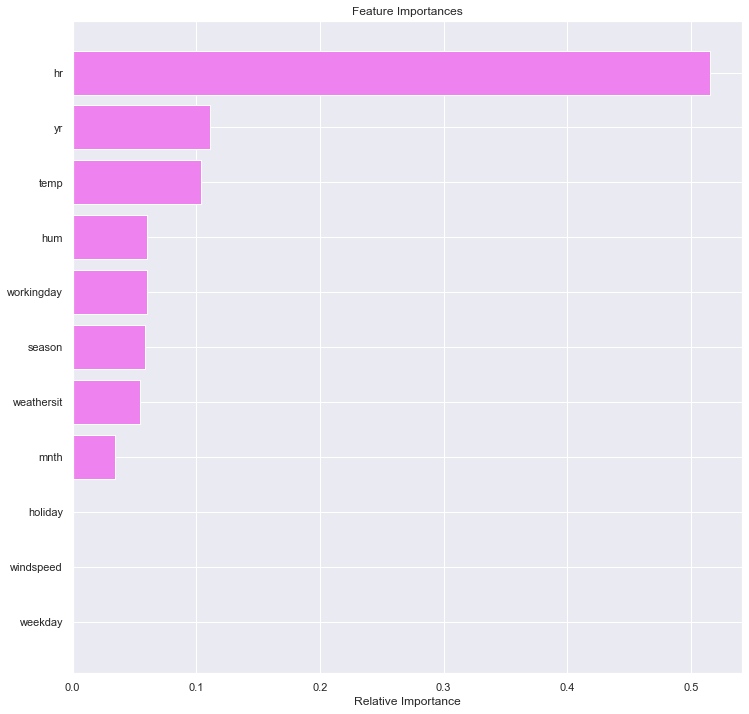

In [65]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature here, followed by yr and atemp.

### Gradient Boosting Regressor
- Each model looks to take the residual error from the previous model and learn from that

In [66]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.8503377068151914
R-square on test set :  0.8491636208605134
RMSE on training set :  69.50491498635265
RMSE on test set :  71.96165892867158


- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

### Hyperparameter Tuning

In [68]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=0.7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=175,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9834885099450281
R-square on test set :  0.954897576983473
RMSE on training set :  23.086199932205023
RMSE on test set :  39.35030059388485


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increase by approx 12% on the test data.
- RMSE has decreased by more than 30 for the test data.

In [70]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.532940
temp        0.130911
workingday  0.091053
yr          0.083328
hum         0.055017
season      0.038272
weekday     0.028135
weathersit  0.017045
mnth        0.014465
windspeed   0.006501
holiday     0.002333


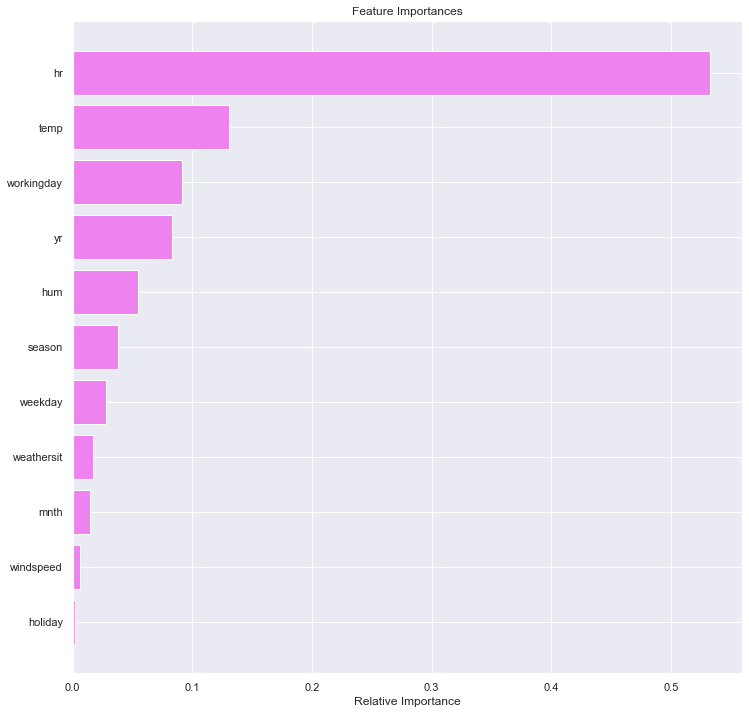

In [71]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature
- temp, yr and workingday have almost equal importance 

### XGBoost Regressor
- Both xgboost and gbm follows the principle of gradient boosting. 
- There are however, the difference in modeling details. 
- Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.
- Also XGBoost is able to leverage paralel prcoessing of models

In [72]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.975799223963453
R-square on test set :  0.9485853299850768
RMSE on training set :  27.949494983056603
RMSE on test set :  42.0137690409726


- XGBoost with default parameters is giving almost as good results as tuned gradient boosting model.

### Hyperparameter Tuning

In [74]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.9819908678668839
R-square on test set :  0.9538370028464498
RMSE on training set :  24.110471921905475
RMSE on test set :  39.81026937287593


In [76]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.268222
workingday  0.265856
yr          0.202379
season      0.081691
temp        0.069143
weathersit  0.050898
weekday     0.016139
holiday     0.014412
mnth        0.013535
hum         0.013365
windspeed   0.004361


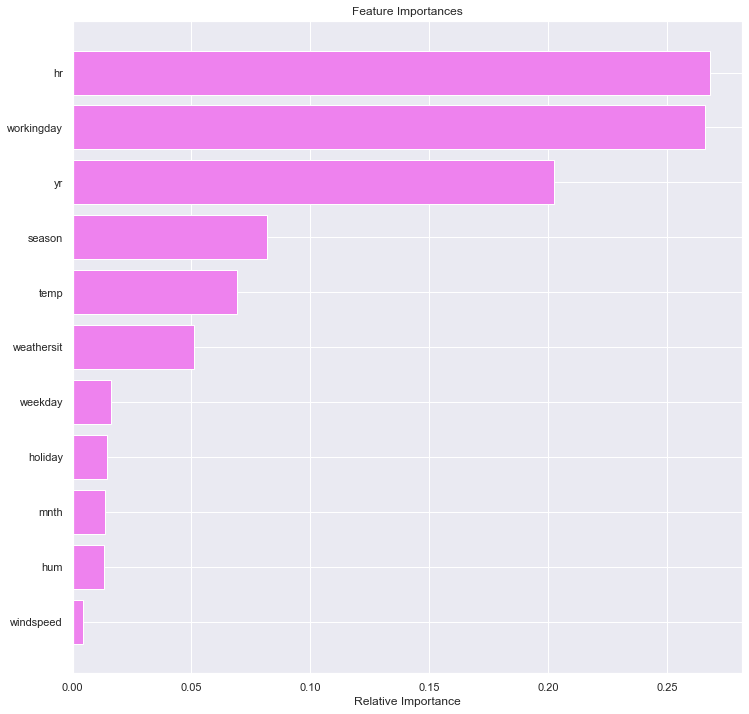

In [77]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [87]:
xgb_tuned.

<bound method XGBModel.evals_result of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)>

- In XGBoost, workingday is the most important feature followed by features - hr and yr

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [78]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [79]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=14,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.1,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
                                             

In [80]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.9825970961043466
R-square on test set :  0.9511088001001715
RMSE on training set :  23.701191523754538
RMSE on test set :  40.969764283098336


## Comparing all models

In [81]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [82]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Decision Tree,0.999994,0.889177,0.442409,61.682701
1,Tuned Decision Tree,0.958755,0.911553,36.487604,55.104908
2,Random Forest,0.991920,0.942085,16.149328,44.590448
3,Tuned Random Forest,0.991958,0.942273,16.111895,44.518103
4,AdaBoost Regressor,0.653482,0.664384,105.760168,107.341954
5,Tuned AdaBoost Regressor,0.689817,0.701682,100.061765,101.201630
6,Gradient Boosting Regressor,0.850338,0.849164,69.504915,71.961659
7,Tuned Gradient Boosting Regressor,0.983489,0.954898,23.086200,39.350301
8,XGBoost Regressor,0.975799,0.948585,27.949495,42.013769
9,Tuned XGBoost Regressor,0.981991,0.953837,24.110472,39.810269


- Tuned gradient boosting model is the best model here. It has highest r2 score of approx 95.5% and lowest RMSE of approx 39 on the test data.
- Gradient boosting, xgboost and stacking regressor are the top 3 models. They are all giving similar performance.

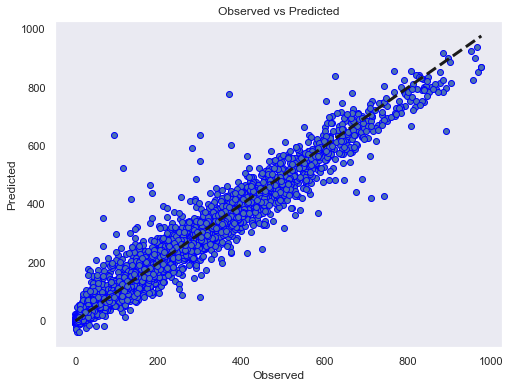

In [83]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

## <a id = "link8"></a> Business Recommendations

- We can use this predictive model for any season and environmental parameters (which we know in advance) and can predict the count of the bikes to be rented. The ability to predict the number of hourly users can allow the entities (businesses/governments) that oversee these systems to manage them in a more efficient and cost-effective manner.
- More bikes can be made available for fall and winter seasons as the number of bikes rented is high in these seasons.
- As number of bikes rented is high for day timings compared to night timings, similarly, fall and winter seasons have more surge compared to other seasons. We can choose differential prices of bikes accordingly.
- As most of the rentals are for commuting to workplaces and colleges on a daily basis, company can launch more stations near busy workplaces or school/colleges to reach out to their main customers.
- Number of bikes rented is heavily dependent on the weather. So, we should adjust the number of available bikes in an area based on the weather forecast.
- Maintenance activities for bikes can be done at night due to low usage of bikes during the night time.
- Company can provide offers or coupons like monthly subscription to compensate the low count on holidays or weekends.